<a href="https://colab.research.google.com/github/molan/Optimal-Implementation-Phase/blob/main/MinImplCosts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python part (Jupyter notebook) for the text in $\LaTeX$

__Closed tasks__
1. Define input data
1. Section of all algorithms (functions)
1. Implicit calculations of global variables changed into functions
1. Unit testing
1. Function ```f_update_nodes_edges(d_TS)``` that updates ```df_node``` and ```df_edge``` with t_theta(v) = 0 and t_theta(e) = 0
1. Prepare different input data, different input files for ```d_TS_H```
1. Input data and expected results
1. Tested function ```f_test_weight_redesign```
1. Tested function ```f_TP_min_deduplication```
1. Tested function ```f_TP_max_deduplication```
1. f_draw_TP_max_deduplication : unit test
1. f_draw_TP_min_deduplication : unit test
1. Draw all vertices in test phase. ```df_node``` defines vertices over definition of test phase
1.  ```f_test_weight_redesign``` : 
1. Algorithm 2 Test Weights Redesign
1. General
    - [x] Is singleton allowed?
        * *Answer*: Singleton is functionality with unit testing that is not a part of *testing*
    - [x] If edges are removed, what about nodes?
        * *Answer*: Nodes should not be removed.
1. ```f_test_weight_redesign_wrapper``` : add argument for test suite
1. Soft result in function ```f_TP_min_deduplication```
1. Soft result in function ```f_TP_max_deduplication```
1.  Add ```d_position``` to file and to parameter
1. Check reading test suites and test phase from file
1. f_draw_TP_max_deduplication : various results

---
__References__
1. https://www.tutorialspoint.com/jupyter/jupyter_notebook_editing.htm
1. https://matplotlib.org/3.1.1/gallery/color/named_colors.html
1. https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_labels_and_colors.html
1. https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html
1. https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html?highlight=weights
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html
1. https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
1. https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

-----

{
“@context”: “http://schema.org”,
“@type”: “Person”,
“name”: “Daniel S. Katz”,
“@id”: “http://orcid.org/0000-0001-5934-7525”
}

## Introduction and basic definitions

### Execution time measurement

In [1]:
# Masure Time
import time
import datetime
notebook_start_time = time.time()

### Ignore Mathlab Warnings
Error example:
```
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
```

In [2]:
#
# to avoid Mathlab warning
#
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Unit testing

In [3]:
import unittest

### Debug

In [4]:
from IPython.core.debugger import set_trace


### Logging

In [5]:
import logging

# name for the logging (logger) and handler to the logger
logger = logging.getLogger(__name__)

# the logger's level
#    10 DEBUG: Detailed debug information, typically of interest only when diagnosing problems
#    20 INFO: Confirmation that things are working as expected
#    30 WARNING: An indication that something unexpected happened, or indicative of some problem in the near future (e.g. ‘disk space low’). The software is still working as expected
#    40 ERROR: Due to a more serious problem, the software has not been able to perform some function
#    50 CRITICAL: A serious error, indicating that the program itself may be unable to continue running
logger.setLevel(logging.WARNING)

# logger file
file_handler = logging.FileHandler('MinImplCosts.log')
logger.addHandler(file_handler)

# format - see https://docs.python.org/3/library/logging.html#logging.LogRecord
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)

#
# Debug individual cell ONLY
#
cell_log_level = logging.WARNING

#
# Debug individual section ONLY
#
section_log_level = logging.DEBUG
section_log_level = logging.WARNING


In [6]:
#
# Draw test suites condition to "draw graphs"
#
bool_draw_TS = True
# bool_draw_TS = False

#
# print to console
#

#ch = logging.StreamHandler()
#ch.setLevel(logging.DEBUG)
#ch.setFormatter(formatter)
#logger.addHandler(ch)

### Install Packages

In [7]:
pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.3.5 which is incompatible.


In [8]:
pip install networkx==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00
Reason for being yanked: Need to resolve: https://github.com/networkx/networkx/pull/4967
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [9]:
pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


### Basic Imports

In [10]:
#
# Imports
#

import pandas
import networkx
from matplotlib import pyplot
import matplotlib

In [11]:
# To create directory
import errno
import os

In [12]:
#
# to get display function for Python without Jupyter notebook
#
from IPython.display import display, Math

In [13]:
#
# to display wide columns
#

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)


<ipython-input-13-5fc1b54f3084>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pandas.set_option('max_colwidth', -1)


### Note about Representation Error

On the https://docs.python.org/3/tutorial/floatingpoint.html:

_Also, since the 0.1 cannot get any closer to the exact value of 1/10 and 0.3 cannot get any closer to the exact value of 3/10, then pre-rounding with ```round()``` function cannot help:_

```python
>>> round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1)
False
```

In [14]:
str(datetime.timedelta(seconds=666))
print("Notebook execution: " + str(datetime.timedelta(seconds=(time.time()-notebook_start_time)))) 

Notebook execution: 0:01:02.608076


## Input Data

### Constants

In [15]:
# constant for "Excel" file delimiter
s_c_graph_data_delimiter = ',';

In [16]:
# folder for results for article
s_c_results = 'results/';
# folder for other results not needed for article
s_c_results_other = 'pdf/';

In [17]:
# constants for figure dimensions (t_c ... tuple constant)
t_c_test_phase_dim = (50,6);
t_c_test_phase_dim = (110,6);
t_c_test_phase_dim = (70,7);

### Create output directories

In [18]:
os.makedirs(s_c_results, exist_ok=True);
os.makedirs(s_c_results+s_c_results_other, exist_ok=True);

### Definition ```d_position```

Variable d_position is (should be) written in a file for definition of graph nodes

In [19]:
# Explicitly defined positions
# d_position = {1: (0,0), 2: (1,0), 3: (1,1), 4: (0,1), 5: (-0.5,0.5), 6:(1.5,0.5)}

### Definition ```d_node_label```

Done: add d_node_label to file - ```f_read_data_from_files``` generates globals: ```d_edge_label```,  ```d_node_label```

### Definition ```d_edge_label```

Done: add d_edge_label to file - ```f_read_data_from_files``` generates globals: ```d_edge_label```,  ```d_node_label```

### Definition ```n_font_size```
Size of font for drawing.

In [20]:
# Font size for labels
# n_font_size = 36;
n_font_size = 50;

In [21]:
str(datetime.timedelta(seconds=666))
print("Notebook execution: " + str(datetime.timedelta(seconds=(time.time()-notebook_start_time)))) 

Notebook execution: 0:01:02.724239


## Definition of Functions

Unit testing
* [f_draw_TP_min_deduplication](#f_draw_TP_min_deduplication)


### Function ```f_debug_start_with_function``` ```f_debug_end_with_function```

In [22]:
def f_debug_start_with_function(s_function_name):
    logger.info('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~> ' + str(s_function_name))

In [23]:
def f_debug_end_with_function(s_function_name):
    logger.info('<.......................................................... ' + str(s_function_name))

### Function ```f_set_from_list_list```

In [24]:
#
# Function f_set_from_list_list
#
# Input
#  list of lists
#
# Return
#  Set of elemetns from flatten list for 1 level
#
f_set_from_list_list = lambda l: set(
    [
        item
        for sublist in l
        for item in sublist
    ]
)

### Function ```f_set_nodes(d_TP, s_suite_name)```

In [25]:
#
# Function f_set_nodes
#
# Input
#   d_TP         .. test phases presented as a dictionary of test suites
#   s_suite_name .. test suite name
#
# Return
#  Set of nodes in test suite
#
def f_set_nodes(d_TP, s_suite_name):
    return(
        set.union(*list(map(set,d_TP[s_suite_name])))
    )

### Function ```f_list_nodes(d_TP, s_suite_name)```

In [26]:
#
# Function f_list_nodes
#
# Input
#   d_TP         .. test phases presented as a dictionary of test suites
#   s_suite_name .. test suite name
#
# Return
#  List of nodes in test suite
#
def f_list_nodes(d_TP, s_suite_name):
    l_tmp_list = [];
    
    l_tmp_list = list(map(set,d_TP[s_suite_name]));
    
    # check empty list
    if not l_tmp_list:
        return(l_tmp_list);
    else:
        return(
            list(set.union(*l_tmp_list))
        )

### Function ```f_set_edges(d_TP, s_suite_name)```

In [27]:
#
# Function f_set_edges
#
# Input
#   d_TP         .. test phases presented as a dictionary of test suites
#   s_suite_name .. test suite name
#
# Return
#  Set of edges in test suite
#
def f_set_edges(d_TP, s_suite_name):
    return(
        set(d_TP[s_suite_name])
    )

### Function ```f_list_edges(d_TP, s_suite_name)```

In [28]:
#
# Function f_list_edges
#
# Input
#   d_TP         .. test phases presented as a dictionary of test suites
#   s_suite_name .. test suite name
#
# Return
#  List of edges in test suite
#
def f_list_edges(d_TP, s_suite_name):
    return(
        d_TP[s_suite_name]
    )

### Function ```f_get_TS_weight```

Note about the implementation: Warning referenced to __Returning a view versus a copy__

Solution:
Reference to an element in data frame ```df.at['line','column']``` and not ```df['column'].loc[line]``` or ```df['column']['line']```


In [29]:
#
# f_get_TS_weight
#
# Results:
#  1. Creates data frame with weighted TS that defines test phase
#  4. Dictionary weights values for test phase
#
# GLOBAL results:
#  2. In df_node and df_edge update (or add) values (columns)
#   - delta
#   - epsilon    
#  3. In df_node and df_edge set values to 0 for t_kappa and t_theta for nodes and edges
#     that are not a part of d_TP

# 2019-12-18
# problem: access to df_edge['kappa']


def f_get_TS_weight(d_TP):
    global df_node
    global df_edge
    f_debug_start_with_function("f_get_TS_weight")

    # set_trace()
    
    # -----------------------------------------
    # 1.
    # Add (or update) values for 
    #    delta
    #    epsilon    
    f_get_graph_weights(df_node,df_edge)
    #
    # -----------------------------------------
    
    # -----------------------------------------
    # 2.
    
    # create data frame with set of TS
    df_TPs_weight = f_get_dataframe_from_dictionary(d_TP)

    logger.debug("df_TPs_weight from dictionary d_TP:")
    logger.debug(df_TPs_weight)
    
    # Definition of columns
    df_TPs_weight["kappa"] = 0
    df_TPs_weight["theta"] = 0
    df_TPs_weight["delta"] = 0
    df_TPs_weight["epsilon"] = 0.0 # IMPORTANT: define float64 data type
    df_TPs_weight["size"] = 0

    # kappa measure for test suite = kappa measure for test phase
#    n_TP_kappa = f_kappa_measure(d_TP)

    for s_TS_name in list(d_TP.keys()):
        logger.debug(str(s_TS_name) + ":")
        df_TPs_weight.at[s_TS_name,'theta'  ]=     f_theta_measure(d_TP, s_TS_name)
        df_TPs_weight.at[s_TS_name,'delta']=f_delta_measure_TS(d_TP, s_TS_name)

        # 2020-04-25
        df_TPs_weight.at[s_TS_name,'epsilon']=   f_epsilon_measure(d_TP, s_TS_name)
        df_TPs_weight.at[s_TS_name,'kappa'  ]=     f_kappa_measure(d_TP, s_TS_name)
        
        # add weight "size of TP" (it is number of edges)
        df_TPs_weight.at[s_TS_name, 'size']=len(df_TPs_weight['TS_edges'].loc[s_TS_name])
        logger.debug(" edges="+str(df_TPs_weight['size'].loc[s_TS_name]))

    # kappa measure for test suite = kappa measure for test phase
#    for s_TS_name in list(d_TP.keys()):
#        df_TPs_weight.at[s_TS_name,'kappa'  ]=n_TP_kappa
    
    logger.debug("df_TPs_weight with calculated weights:")
    logger.debug(df_TPs_weight)
    
    #
    # -----------------------------------------
    
    # -----------------------------------------
    # 3.
    #
    # Nodes and edges that are not a part of ```d_TP```
    # should have a special value for test (implementation) status: 0
    # It means that they should not be developed and should not be tested - they are out of scope.
    #
    
    #
    # get set of edges from dictionary ```d_TS_H```
    #
    set_edges_d_TS = f_set_from_list_list(
        list(d_TS_H.values())
    )

    #
    # get set of edges from data frame ```df_edge```
    #
    set_edges_df_edge = set((list(df_edge.to_dict().values())[0]).keys())

    #
    # get set of edges from data frame ```df_edge``` and not from dictionary ```d_TS_H```
    #
    set_edges_only_df_edge = set_edges_df_edge - set_edges_d_TS
    
    #
    # update data frame ```df_edge``` according to edges that are not in ```d_TS_H```
    #
    for t_the_edge in set_edges_only_df_edge:
        logger.debug("t_theta("+str(t_the_edge)+") = 0")
        df_edge.at[t_the_edge,'t_theta'] = 0
        logger.debug("t_kappa("+str(t_the_edge)+") = 0")
        df_edge.at[t_the_edge,'t_kappa'] = 0

    #
    # get set of nodes from dictionary ```d_TS_H```
    #
    set_nodes_d_TS = f_set_from_list_list(set_edges_d_TS)
#    f_print_var_value('set_nodes_d_TS')
    
    #
    # get set of nodes from data frame ```df_node```
    #
    set_nodes_df_node = set((list(df_node.to_dict().values())[0]).keys())
#    f_print_var_value('set_nodes_df_node')
    
    #
    # get set of nodes from data frame ```df_node``` and not from dictionary ```d_TS_H```
    #
    set_nodes_only_df_node = set_nodes_df_node - set_nodes_d_TS
#    f_print_var_value('set_nodes_only_df_node')
    #
    # update data frame ```df_node``` according to nodes that are not in ```d_TS_H```
    #
    for n_the_node in set_nodes_only_df_node:
        logger.debug("t_theta("+str(n_the_node)+") = 0")
        df_node.at[n_the_node,'t_theta'] = 0
        logger.debug("t_kappa("+str(n_the_node)+") = 0")
        df_node.at[n_the_node,'t_kappa'] = 0
    #
    # -----------------------------------------

    # -----------------------------------------
    # 4.
    # Add a special row named TP_WEIGHT = "TP_weight" for measure values for test phase
    # kappa measure for test suite = kappa measure for test phase
    # d_TP_weight
    
    d_TP_weight = {}
    
    # 'kappa' weights for all/each test suites are the same: take/get the first one
#    d_TP_weight['kappa'] = n_TP_kappa
    
    d_TP_weight['theta'] = 0
    for s_TS_name in list(d_TP.keys()):
        d_TP_weight['theta'] += df_TPs_weight.at[s_TS_name,'theta']

    d_TP_weight['delta'] = f_delta_measure_TP(d_TP)
                                                    
    d_TP_weight['epsilon'] = 0
    for n_e in df_edge['epsilon']:
        d_TP_weight['epsilon'] += n_e
    for n_v in df_node['epsilon']:
        d_TP_weight['epsilon'] += n_v
    
    #
    # -----------------------------------------

    f_debug_end_with_function("f_get_TS_weight")
    return(df_TPs_weight,d_TP_weight)

### Function ```f_get_dataframe_from_dictionary(d_x)```
Function ```f_get_dataframe_from_dictionary``` creates test phase presented as data frame with test suites from ```d_x```.

In [30]:
#
# f_get_dataframe_from_dictionary
#
# Create data frame with set of test suites defined in dictionary d_x
#
# input
#  d_x
#
# output/return
#  df_TP_edges_H with infos about graph edges
#

def f_get_dataframe_from_dictionary(d_x):
    f_debug_start_with_function("f_get_dataframe_from_dictionary")
    
    #
    # Definition of dataframe ```df_TP_edges_H``` reate local variabl
    #
    df_TP_edges_H = pandas.DataFrame(index=d_x)

    #
    # Add column 'TS_edges' to data frame
    #
    df_TP_edges_H['TS_edges'] = list(d_x.values())

    f_debug_end_with_function("f_get_dataframe_from_dictionary")
    return(df_TP_edges_H)

### Function ```f_draw_graph_TP_pure(.,.,.,.,.,.,.)```

In [31]:
#
# input parameter:
# * Hx ... index (string, name) to supbraph edges in d_TS_H[] dictionary
# * d_TS_H ... edges for TS stored as Python dictionary Output
# * df_edge ... graph edges for functionality graph
# * d_node_label ... labels for all nodes
# * d_edge_label ... labels for all edges
# * n_font_size ... font size
# * my_base_file_name
# * d_position ... dictionary for possition of drawing
#
def f_draw_graph_TP_pure(
    my_Hx,
    d_TS_H,
    df_edge,
    d_local_node_label,
    d_local_edge_label,
    n_font_size,
    d_position,
    s_node_color,
    s_edge_color,
    n_alpha=1,
    t_c_test_phase_dim=t_c_test_phase_dim,
    bool_print_to_terminal = True
):
    f_debug_start_with_function("f_draw_graph_TP_pure")
    
    logger.debug(str(type(d_TS_H)))
    
    n_graph_node_size = 8000
    
    # sub graph and complement to sub graph
    nxg_G = networkx.Graph(df_edge.index.tolist())
    nxg_sub_graph = networkx.Graph(df_edge.index.tolist()).edge_subgraph(d_TS_H[my_Hx])
    nxg_complementary_sub_graph = nxg_G.edge_subgraph(list(set(df_edge.index.tolist()) - set(d_TS_H[my_Hx])))
    
    # specify the size (and the proportion)
    pyplot.figure(1,figsize=t_c_test_phase_dim)
    
    '''
    logger.debug('TP (nodes - edges):' +
          str(nxg_sub_graph.nodes) + '-' +
          str(nxg_sub_graph.edges)
    )
    logger.debug('Complementary TP (nodes - edges):' +
          str(nxg_complementary_sub_graph.nodes) + '-' +
          str(nxg_complementary_sub_graph.edges)
    )
    '''
    d_pos = d_position;
    
    # -------------------------------------------------
    # draw TP edges - blue 99%
    
#     Gedges = networkx.Graph()
#     Gedges.add_edges_from(nxg_G)
    # draw edges and nodes - no need to draw nodes (TODO: don't draw nodes)
    networkx.draw(
        nxg_sub_graph,
        d_pos,
        labels={},
        node_color=s_node_color, #'lightskyblue',
#        edge_color='lightskyblue',
        edge_color = s_edge_color, #'aliceblue', #'lightbluegrey',
        width=8,
        node_size=n_graph_node_size*0.8,
        alpha=n_alpha, # transparency (default=1.0)
    );
    
    # draw complementary graph edges - silver 100%
    networkx.draw(
        nxg_complementary_sub_graph,
        d_pos,
        labels={},
        node_color='silver',
        edge_color='silver',
        style='dotted', # (solid|dashed|dotted|dashdot)
        width=8,
        node_size=n_graph_node_size,
        # alpha=0.4,
    );

    # draw all nodes silver 99%, alpha=1
    # noded only from TP
    Gnodes = networkx.Graph()
    Gnodes.add_nodes_from(nxg_G)    
    networkx.draw(
        Gnodes,
        d_pos,
        labels={},
        node_color = 'silver',
        edge_color = 'silver',
        node_size=n_graph_node_size*1,
        # alpha=0.4,
    );
    
    '''
    # 2019-12-17: no complementary graph nodes
    # draw complementary graph nodes 80%
    Gnodes = networkx.Graph()
    # Gnodes.add_nodes_from(nxg_complementary_sub_graph)    
    Gnodes.add_nodes_from(nxg_G)
    networkx.draw(
        Gnodes,
        d_pos,
        labels={},
        node_color = 'white',
        node_size=n_graph_node_size*0.8,
        # alpha=0.4,
    );
    '''
    
    # draw TP graph nodes 80%
    Gnodes = networkx.Graph()
    # 2019-12-17: Gnodes.add_nodes_from(nxg_sub_graph)
    Gnodes.add_nodes_from(nxg_G) # 2019-12-17
    networkx.draw(
        Gnodes,
        d_pos,
        labels={},
        font_size = n_font_size,
        font_color = 'black',
#        node_color = 'lightskyblue',
#        node_color = '#B7C9E2', #'lightbluegrey',
        node_color = s_node_color, #'aliceblue', #'lightbluegrey',
        node_size=n_graph_node_size*0.8,
        alpha=n_alpha, # transparency (default=1.0)
    );
    
    # -------------------------------------------------
    # Labels
    # Problem: cannot draw labels for TS only
    # -------------------------------------------------
    
    #
    # remove labels from 'd_local_node_label' for nodes that are not in TP 'nxg_sub_graph'
    #
    logger.debug('d_local_node_label = ' + str(d_local_node_label))
    d_node_label_copy = d_local_node_label.copy()
    logger.debug('d_node_label_copy = ' + str(d_node_label_copy))
    for n_v in d_local_node_label:
        if n_v not in nxg_sub_graph.nodes:
            logger.debug(n_v)
            #d_local_node_label = d_local_node_label.drop(labels=n_v)    
            del d_node_label_copy[n_v]
    
    # node labels
    networkx.draw_networkx_labels(
        # 2019-12-17: no complementary graph nodes
        # 2019-12-17: nxg_sub_graph, # TP
        nxg_G,
        #Gnodes, # all graphs
        d_pos,
        font_family = 'Times New Roman',
        # 2019-12-17: no complementary graph nodes
        # 2019-12-17: labels=d_node_label_copy,
        labels=d_local_node_label,
        font_size = n_font_size,
        font_color = 'black',
    );
    
    #
    # remove labels from 'd_local_edge_label' for nodes that are not in TP 'nxg_sub_graph'
    #
    logger.debug('d_local_edge_label = ' + str(d_local_edge_label))
    d_edge_label_copy = d_local_edge_label.copy()
    logger.debug('d_edge_label_copy = ' + str(d_edge_label_copy))
    for n_e in d_local_edge_label:
        if n_e not in nxg_sub_graph.edges:
            logger.debug(n_e)
            #d_local_edge_label = d_local_edge_label.drop(labels=n_e)
            del d_edge_label_copy[n_e]

    # edge labels
    networkx.draw_networkx_edge_labels(
        nxg_sub_graph, # TP
        #Gnodes, # all graphs
#        nxg_G,
        d_pos,
        d_edge_label_copy,
        0.5, # label_pos (float) – Position of edge label along edge (0=head, 0.5=center, 1=tail)
        font_size = n_font_size,
        font_family = 'Times New Roman',
        bbox=dict(boxstyle="circle,pad=0.1",fc="w",ec="w"), # style for edge labels
    );
    # valid strings are ['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']
    pyplot.rcParams['mathtext.fontset'] = 'stix';
    
    f_debug_end_with_function("f_draw_graph_TP_pure")

In [32]:
#
# input parameter:
# * Hx ... index (string, name) to supbraph edges in d_TS_H[] dictionary
# * d_TS_H ... edges for TS stored as Python dictionary Output
# * df_edge ... graph edges for functionality graph
# * d_node_label ... labels for all nodes
# * d_edge_label ... labels for all edges
# * n_font_size ... font size
# * my_base_file_name
# * d_position ... dictionary for possition of drawing
#
# 2020-07-31
#
def f_draw_graph_TP_pure(
    my_Hx,
    d_TS_H,
    df_edge,
    d_local_node_label,
    d_local_edge_label,
    n_font_size,
    d_position,
    s_node_color,
    s_edge_color,
    n_alpha=1,
    t_c_test_phase_dim=t_c_test_phase_dim,
    bool_print_to_terminal = True
):
    f_debug_start_with_function("f_draw_graph_TP_pure")
    
    logger.debug(str(type(d_TS_H)))
    
    n_graph_node_size = 8000
    
    # sub graph and complement to sub graph
    nxg_G = networkx.Graph(df_edge.index.tolist())
    nxg_sub_graph = networkx.Graph(df_edge.index.tolist()).edge_subgraph(d_TS_H[my_Hx])
    nxg_complementary_sub_graph = nxg_G.edge_subgraph(list(set(df_edge.index.tolist()) - set(d_TS_H[my_Hx])))
    
    # specify the size (and the proportion)
    pyplot.figure(1,figsize=t_c_test_phase_dim)
    
    '''
    logger.debug('TP (nodes - edges):' +
          str(nxg_sub_graph.nodes) + '-' +
          str(nxg_sub_graph.edges)
    )
    logger.debug('Complementary TP (nodes - edges):' +
          str(nxg_complementary_sub_graph.nodes) + '-' +
          str(nxg_complementary_sub_graph.edges)
    )
    '''
    d_pos = d_position;
    
    # -------------------------------------------------
    # (1) draw graph that presents not TC
    # Node color: silver for border color
    # Edge stype: dotted
    networkx.draw(
        nxg_complementary_sub_graph,
        d_pos,
        labels={},
        edge_color='silver',
        style='dotted', # (solid|dashed|dotted|dashdot)
        width=8,
        node_size=n_graph_node_size,
        node_color = 'silver',
    );

    
    # -------------------------------------------------
    # (2) draw nodes from TS black = border color
    # draw nodes - no need to draw edges: edgelist ={}
    Gnodes = networkx.Graph()
    Gnodes.add_nodes_from(nxg_sub_graph)    
    networkx.draw(
        Gnodes,
        d_pos,
        labels={},
        node_color = 'black',
        node_size=n_graph_node_size*1,
        edgelist ={}, # no need to draw edges
    );
    
    # -------------------------------------------------
    # (3) draw graph nodes from not TC - inside color, 80% of node size
    Gnodes = networkx.Graph()
    Gnodes.add_nodes_from(nxg_complementary_sub_graph) # 2020-07-31
    networkx.draw(
        Gnodes,
        d_pos,
        labels={},
        font_size = n_font_size,
        font_color = 'black',
        node_color = 'aliceblue', #'lightbluegrey',
        node_size=n_graph_node_size*0.8,
        alpha=n_alpha, # transparency (default=1.0)
    );
    
    # -------------------------------------------------
    # (4) draw graph nodes and edges from TC - inside blue color, 80% of node size
    networkx.draw(
        nxg_sub_graph,
        d_pos,
        labels={},
        node_color = s_node_color,
        edge_color = s_edge_color, #'aliceblue', #'lightbluegrey',
        width=8,
        node_size=n_graph_node_size*0.8,
        alpha=n_alpha, # transparency (default=1.0)
    );
    
    # -------------------------------------------------
    # Labels
    # Problem: cannot draw labels for TS only
    # -------------------------------------------------
    
    #
    # remove labels from 'd_local_node_label' for nodes that are not in TP 'nxg_sub_graph'
    #
    logger.debug('d_local_node_label = ' + str(d_local_node_label))
    d_node_label_copy = d_local_node_label.copy()
    logger.debug('d_node_label_copy = ' + str(d_node_label_copy))
    for n_v in d_local_node_label:
        if n_v not in nxg_sub_graph.nodes:
            logger.debug(n_v)
            #d_local_node_label = d_local_node_label.drop(labels=n_v)    
            del d_node_label_copy[n_v]
    
    # -------------------------------------------------
    # (5) print node labels
    networkx.draw_networkx_labels(
        # 2019-12-17: no complementary graph nodes
        # 2019-12-17: nxg_sub_graph, # TP
        nxg_G,
        #Gnodes, # all graphs
        d_pos,
        font_family = 'Times New Roman',
        # 2019-12-17: no complementary graph nodes
        # 2019-12-17: labels=d_node_label_copy,
        labels=d_local_node_label,
        font_size = n_font_size,
        nodelist = {},
        font_color = 'black',
    );
    
    #
    # remove labels from 'd_local_edge_label' for nodes that are not in TP 'nxg_sub_graph'
    #
    logger.debug('d_local_edge_label = ' + str(d_local_edge_label))
    d_edge_label_copy = d_local_edge_label.copy()
    logger.debug('d_edge_label_copy = ' + str(d_edge_label_copy))
    for n_e in d_local_edge_label:
        if n_e not in nxg_sub_graph.edges:
            logger.debug(n_e)
            #d_local_edge_label = d_local_edge_label.drop(labels=n_e)
            del d_edge_label_copy[n_e]

    # -------------------------------------------------
    # (6) edge labels
    networkx.draw_networkx_edge_labels(
        nxg_sub_graph, # TP
        #Gnodes, # all graphs
#        nxg_G,
        d_pos,
        d_edge_label_copy,
        0.5, # label_pos (float) – Position of edge label along edge (0=head, 0.5=center, 1=tail)
        font_size = n_font_size,
        font_family = 'Times New Roman',
        nodelist = {},
        bbox=dict(boxstyle="circle,pad=0.1",fc="w",ec="w"), # style for edge labels
    );
    # valid strings are ['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']
    pyplot.rcParams['mathtext.fontset'] = 'stix';
    
    f_debug_end_with_function("f_draw_graph_TP_pure")

### Function ```f_get_graph_weights(dfN,dfE)```

Calculating graph weights
* implementation cost (delta $\lambda$)
* value (epsilon $\epsilon$)

It is important not to use variable name ```lambda``` - it is used for lambda function in Python. Instead of ```lambda``` variable name is ```delta```, *graph* lambda.

The function is included in f_get_TS_weight

In [33]:
#
# f_get_graph_weights
#
# Creates data frame with new columns
#  delta
#  epsilon
#
# input data frames
#  df_node
#  df_edge
#
# output
#  df_node with new columns
#  df_edge with new columns
#
def f_get_graph_weights(dfN,dfE):
    f_debug_start_with_function("f_get_graph_weights")
    # Nodes
    dfN["delta"] = (dfN["kappa"] * abs(dfN["t_kappa"])) + (dfN["theta"] * abs(dfN["t_theta"]))
    dfN["epsilon"] = abs(dfN["t_kappa"] * dfN["t_theta"]) * dfN["sigma"]

    #Edges
    dfE["delta"] = (dfE["kappa"] * abs(dfE["t_kappa"])) + (dfE["theta"] * abs(dfE["t_theta"]))
    dfE["epsilon"] = abs(dfE["t_kappa"] * dfE["t_theta"]) * dfE["sigma"]
    
    f_debug_end_with_function("f_get_graph_weights")

### Function ```f_draw_TS```

In [34]:
# Input algorithm:
#   f_draw_set_TS ... draw set of TS with a use of f_draw_graph_TP_pure
#
# Input data:
#   d_TP  ... dictionary of TS
#   s_weight      ... OPTIONAL: string - given graph weight name for in "df_node"
#   fig_file_name ... OPTIONAL: string - file name of the output file of drawing
#   s_title       ... OPTIONAL: string - title of drawing
#
def f_draw_TS(
    d_TP, 
    s_weight="", 
    s_file_name="", 
    s_title="",
    bool_print_to_terminal = True,
    t_test_phase_dim=t_c_test_phase_dim
):
    global bool_draw_TS;
    
    f_debug_start_with_function("f_draw_TS")
#    print(type(d_TS_H))

    #
    # Draw test suites condition.
    #  bool_draw_TS
    #
    if bool_draw_TS:
    
        d_local_node_label = d_node_label.copy()
        d_local_edge_label = d_edge_label.copy()

        if s_weight:
            # there is given graph weight name for in "df_node"

            # update values to format it as LaTeX number
            for key in d_node_label:
                d_local_node_label[key]="$"+str(df_node[s_weight].to_dict()[key])+"$"

            for key in d_edge_label:
                d_local_edge_label[key]="$"+str(df_edge[s_weight].to_dict()[key])+"$"

        logger.debug("f_draw_TS :" + str(s_weight))
#        display(d_local_node_label)
#        display(d_local_edge_label)

        #
        # original TP definitnion 'd_TS_H'
        #
        pyplot.figure(figsize=t_test_phase_dim); # different figsize proportion for on screen and to file
        f_draw_set_TS(
            d_TP,
            df_edge,
            d_local_node_label,
            d_local_edge_label,
            n_font_size,
            d_position,
            s_file_name,
            s_title,
            bool_print_to_terminal
        )
        
    f_debug_end_with_function("f_draw_TS")

### Function ```f_draw_set_TS(.,.,.,.,.,.,.)```

In [35]:
# Input algorithm:
#   f_draw_set_TS ... draw TS on the default figure (with a use of f_draw_graph_TP_pure)
#
# Input data:
#   d_TP    ... dictionary of TS
#   fig_file_name ... OPTIONAL: string - file name of the output file of drawing
#   s_title       ... OPTIONAL: string - title of drawing
#
def f_draw_set_TS(
    d_TP,
    df_edge,
    d_local_node_label,
    d_local_edge_label,
    n_font_size,
    d_position,
    fig_file_name = "",
    s_title = "",
    bool_print_to_terminal = True
):
    f_debug_start_with_function("f_draw_set_TS")
    
    # adjust space between graphs - remove vertical space between figures
    pyplot.subplots_adjust(wspace=0);
       
    # size (width) of test phase figure, where hight is 1
    n_tp_fig_cols = len(d_TP);

    #
    i = 0
    for s_TS in d_TP:
        i=i+1
#        print(s_TS,i)
#        print(type(s_TS))
#        print(s_TS.index)
        pyplot.subplot(1, n_tp_fig_cols, i); # subplot(nrows, ncols, index,)
#        pyplot.title("Title:")
        f_draw_graph_TP_pure(
            s_TS, # supbraph (string name) of edges in d_TS_H[] dictionary
            d_TP,
            df_edge,
            d_local_node_label,
            d_local_edge_label,
            n_font_size,
            d_position,
            'lightskyblue',
            'lightskyblue'
        );
    
    if fig_file_name:
        # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
        pyplot.savefig(s_c_results+fig_file_name, transparent=True, optimize=True, bbox_inches='tight');# PDF
   
    pyplot.suptitle(s_title, fontsize=36)
    if bool_print_to_terminal:
#        print("bool_print_to_terminal =", bool_print_to_terminal);
        pyplot.show();
    else:
#        print("bool_print_to_terminal =", bool_print_to_terminal);
        pyplot.close();
            
    f_debug_end_with_function("f_draw_set_TS")

### Function ```f_TS_nodes(d_TS_local,s_TS_local)```

In [36]:
#
# create set of nodes for test suite s_TS_local
#
# 2019-12-01: Fix - added parameter d_TS_local (and not d_TS_H)
#
def f_TS_nodes(d_TS_local,s_TS_local):
    f_debug_start_with_function("f_TS_nodes")
    
    set_nodes = set()
    for elt in d_TS_local[s_TS_local]:
        set_nodes.add(elt[0])
        set_nodes.add(elt[1])

    f_debug_end_with_function("f_TS_nodes")
    return(set_nodes)

### Function ```f_kappa_measure(d_sH)``` - development cost

$\kappa$ .. _the **development** cost for test phase $\mathcal H$:
 	\begin{eqnarray}
		&& \kappa(H) = 
		\!\!\!\! \sum_{v_j\in V(H)} \kappa(v_j)\;\tilde{\kappa}_{vj} +
		\!\!\!\! \sum_{e_j\in E(H)} \kappa(e_j)\;\tilde{\kappa}_{ej}
	\end{eqnarray}
$\kappa$ .. the **development cost** for test phase $\mathcal H$:
	\begin{eqnarray}
		&& \kappa({\mathcal H}) =
		\!\!\!\! \sum_{v_j\in V({\mathcal H})} \kappa(v_j)\;\tilde{\kappa}_{vj} +
		\!\!\!\! \sum_{e_j\in E({\mathcal H})} \kappa(e_j)\;\tilde{\kappa}_{ej}
	\end{eqnarray}

In [37]:
#
# Test Cost value (kappa) 2020-04-25
#
def f_kappa_measure(
    d_TS_H,
    s_TS_name
):
    f_debug_start_with_function("f_kappa_measure")
    global df_edge
    global df_node
    
    n_kappa = sum(
        df_edge["kappa"][f_list_edges(d_TS_H,s_TS_name)] * df_edge["t_kappa"][f_list_edges(d_TS_H,s_TS_name)]
    ) + sum(
        df_node["kappa"][f_list_nodes(d_TS_H,s_TS_name)] * df_node["t_kappa"][f_list_nodes(d_TS_H,s_TS_name)] +
        df_node["theta"][f_list_nodes(d_TS_H,s_TS_name)] * df_node["t_theta"][f_list_nodes(d_TS_H,s_TS_name)]
    );

    logger.debug(" n_kappa(nodes,edges)=("+str(n_kappa)+")" )
    f_debug_end_with_function("f_kappa_measure")
    return(n_kappa)


```python
#
# Development cost value (kappa) for test suite
# Important: "kappa for test suite" = "kappa for test phase"
#
def f_kappa_measure(
    d_TS_H
):
    f_debug_start_with_function("f_kappa_measure")
    # set debug: set_strace()
    # set_trace()
    
    #
    # Create set of edges and set of nodes from all TS in dictionary
    #
    set_edge = set()
    set_node = set()
    for l_i in list(d_TS_H.values()): # get list of edges from test suite
        logger.debug("list of edges from test suite = "+str(l_i))
        for t_i in l_i: #  get tuple (edge) from list of edges
            logger.debug("  "+str(t_i)+"  -  "+str(t_i[0])+","+str(t_i[1]))
            set_edge.add(t_i)
            set_node.add(t_i[0])
            set_node.add(t_i[1])
    logger.debug("Set of all edges in test phase ="+str(set_edge))
    logger.debug("Set od all nodes in test phase ="+str(set_node))

    #
    # Sum of kappa measures for vertices and edges
    # and sum of theta measure for vertices (unit tests are part of development)
    #
    n_kappa_nodes = 0
    n_theta_nodes = 0
    for n_i in set_node:
        logger.debug("kappa("+str(n_i)+")="+str(df_node["kappa"][n_i])+",
                     theta("+str(n_i)+")="+str(df_node["theta"][n_i]))
        n_kappa_nodes += df_node["kappa"][n_i] * abs(df_node["t_kappa"][n_i])
        n_theta_nodes += df_node["theta"][n_i] * abs(df_node["t_theta"][n_i])
    logger.debug("n_kappa_n="+str(n_kappa_nodes))
    logger.debug("n_theta_n="+str(n_theta_nodes))
    n_kappa_edges = 0
    for t_i in set_edge:
        logger.debug("kappa("+str(t_i[0])+","+str(t_i[1])+")="+str(df_edge["kappa"][t_i]))
        n_kappa_edges += df_edge["kappa"][t_i] * abs(df_edge["t_kappa"][t_i])
    logger.debug("n_kappa_edges="+str(n_kappa_edges))
    
    n_sum = n_kappa_nodes + n_theta_nodes + n_kappa_edges
    logger.debug(" n_kappa(nodes,edges)=("+str(n_kappa_nodes)+","+str(n_theta_nodes)+",
                 "+str(n_kappa_edges)+")" + str(n_sum))
    f_debug_end_with_function("f_kappa_measure")
    return(n_sum)
```

### Function ```f_theta_measure(d_sH,s_TS)``` - test cost

$\theta$ .. _the test cost for test suite_ $H$ and _test phase_ $\mathcal H$:
 	\begin{eqnarray}
		% \label{eq:PhaseTestingCost}
		 \theta(H) = \!\!\!\! \sum_{e\in E(H)} \theta(e)\;|\tilde{\theta}(e)| 
		 % + \sum_{v\in V(H)} \theta(v)\;|\tilde{\theta}(v)| \!\!\! % \\
		 \quad \textrm{ and } \quad \theta({\mathcal H}) = \sum_{H^i \in {\mathcal H}} \theta(H^i). % \nonumber
   \end{eqnarray}


In [38]:
#
# Test Cost value (theta)
#
def f_theta_measure(
    d_TS_H,
    s_TS_name
):
    f_debug_start_with_function("f_theta_measure")
    global df_edge

    n_theta_edges = sum(
        df_edge["theta"][d_TS_H[s_TS_name]] * abs(df_edge["t_theta"][d_TS_H[s_TS_name]])
    )

    logger.debug(" n_theta(nodes,edges)=("+str(n_theta_edges)+")" )
    f_debug_end_with_function("f_theta_measure")
    return(n_theta_edges)


### Function ```f_delta_measure_T[S|P](d_sH[,s_TS])``` - implementation cost

$\lambda$ .. the _implementation cost for test suite_ $H$ and _test phase_ $\mathcal H$:
 	\begin{eqnarray}
	\label{eq:ImplementationCost}
	  \lambda(H)=\sum_{v\in V(\mathcal H)} \lambda(v) + \sum_{e\in E(H)} \lambda(e) \quad \textrm{ and } \quad % \\
	  \lambda(\mathcal H)=\sum_{v\in V(\mathcal H)} \lambda(v) + \sum_{H\in V(\mathcal H)}\sum_{e\in E(H)} \lambda(e). % \nonumber
	\end{eqnarray}


Function "delta" ($\lambda$) is a sum of measures "kappa" and "theta" for vertices and edges:
	\begin{equation}
	\label{eq:ImplementationCostVerticesEdges}
	\begin{aligned}
	& \lambda : V(G^P)\cup E(G^P)\to{\mathbb R}^+ \cup \{0\} \\
	& \lambda(v)=\kappa(v)+\theta(v) \quad \textrm{ and } \quad
	     \lambda(e)=\kappa(e)+\theta(e).
	\end{aligned}
	\end{equation}


In [39]:
#
# Implementation cost value (lambda) for test suite
#
def f_delta_measure_TS(
    d_TS_H,
    s_TS_name
):
    f_debug_start_with_function("f_delta_measure_TS")
    global df_edge
    global df_node

    n_delta_v = df_node['delta'][f_list_nodes(d_TS_H,s_TS_name)].sum()
    n_delta_e = df_edge['delta'][f_list_edges(d_TS_H,s_TS_name)].sum()
    n_delta_test_suite = n_delta_v + n_delta_e

    logger.debug(" n_delta_test_suite(test_suite)=("+str(n_delta_v)+"+"+str(n_delta_e)+")" )
    f_debug_end_with_function("f_delta_measure_TS")
    return(n_delta_test_suite)


In [40]:
#
# Implementation cost value (lambda) for test phase
#
def f_delta_measure_TP(
    d_TS_H
):
    f_debug_start_with_function("f_delta_measure_TP")
    global df_edge
    global df_node

    n_delta_v = df_node['delta'].sum()
    
    n_delta_e = 0
    for s_H in d_TS_H:
        n_tmp_delta_H = df_edge['delta'][d_TS_H[s_H]].sum()
        logger.debug("  delta("+str(s_H)+")="+str(n_tmp_delta_H))
        n_delta_e += n_tmp_delta_H
    
    n_delta_test_suite = n_delta_v + n_delta_e

    logger.debug(" n_delta_test_suite(test_suite)=("+str(n_delta_v)+"+"+str(n_delta_e)+")" )
    f_debug_end_with_function("f_delta_measure_TP")
    return(n_delta_test_suite)


### Function ```f_epsilon_measure(d_TS_H,s_TS_name)``` - implementation value

$\epsilon$ .. the _implementation value for test suite_ $H$ and _test phase_ $\mathcal H$:
	\begin{eqnarray}
	\epsilon(H) = \!\!\!\! \sum_{v\in V(H)} \epsilon(v) + \!\!\!\sum_{e\in E(H)} \epsilon(e)
	\quad \textrm{ and } \quad
	\epsilon({\mathcal H}) = \!\!\!\! \sum_{v\in V({{G^P}})} \epsilon(v) + \!\!\!\sum_{e\in E({{\mathcal H}})} \epsilon(e).  
	\end{eqnarray}
    where
	\begin{eqnarray}
    	& \epsilon(v)=|\tilde{\theta}(v)\cdot\tilde{\kappa}(v)|\cdot \sigma(v) \quad \textrm{ and } \quad % \in V({\mathcal H})\cup E({\mathcal H})
	   \epsilon(e)=|\tilde{\theta}(e)\cdot\tilde{\kappa}(e)|\cdot \sigma(e) %, \quad \in V({\mathcal H})\cup E({\mathcal H})
	\end{eqnarray}

In [41]:
#
# Test Cost value (epsilon) 2020-04-25
#
def f_epsilon_measure(
    d_TS_H,
    s_TS_name
):
    f_debug_start_with_function("f_epsilon_measure")
    global df_edge
    global df_node
    
    n_epsilon = sum(
        df_edge["epsilon"][f_list_edges(d_TS_H,s_TS_name)]
    ) + sum(
        df_node["epsilon"][f_list_nodes(d_TS_H,s_TS_name)]
    );

    logger.debug(" n_epsilon(nodes,edges)=("+str(n_epsilon)+")" )
    f_debug_end_with_function("f_epsilon_measure")
    return(n_epsilon)


```python
#
# Implementation cost value (epsilon)
#
def f_epsilon_measure(
    d_TS_H,
    s_TS_name
):
    global df_node
    global df_edge
    
    f_debug_start_with_function("f_epsilon_measure")

    #
    # Create set of edges and set of nodes from all TS in dictionary
    #
    set_edge = set()
    set_node = set()
    for l_i in list(d_TS_H.values()): # get list of edges from test suite
        logger.debug("list of edges from test suite = "+str(l_i))
        for t_i in l_i: #  get tuple (edge) from list of edges
            logger.debug("  "+str(t_i)+"  -  "+str(t_i[0])+","+str(t_i[1]))
            set_edge.add(t_i)
            set_node.add(t_i[0])
            set_node.add(t_i[1])
    logger.debug("Set of all edges in test phase ="+str(set_edge))
    logger.debug("Set od all nodes in test phase ="+str(set_node))

    #
    # Sum of kappa measures for vertices and edges
    # and sum of theta measure for vertices (unit tests are part of development)
    #
    n_epsilon_nodes = 0
    for n_i in set_node:
        n_epsilon_nodes += df_node["epsilon"][n_i]
        logger.debug("epsilon("+str(n_i)+")="+str(df_node["epsilon"][n_i]))
    logger.debug("n_epsilon_nodes="+str(n_epsilon_nodes))
    n_epsilon_edges = 0
    for t_i in set_edge:
        logger.debug("epsilon("+str(t_i[0])+","+str(t_i[1])+")="+str(df_edge["epsilon"][t_i]))
        n_epsilon_edges += df_edge["epsilon"][t_i]
    logger.debug("n_epsilon_edges="+str(n_epsilon_edges))
    
    # nodes that are endnodes of edges in test suite, ONLY
#     n_epsilon_nodes = sum(
#         df_node["epsilon"][list(f_TS_nodes(d_TS_H,s_TS_name))]
#     )
    n_sum = n_epsilon_nodes + n_epsilon_edges
    logger.debug(" n_epsilon(nodes,edges)=("+str(n_epsilon_nodes)+","+str(n_epsilon_edges)+")=" + str(n_sum))
    f_debug_end_with_function("f_epsilon_measure")
    return(n_sum)
```

### Function ```f_sort_TS_in_TP(df_TP,s_weight,d_TS_H,ascending)```
Function ```f_sort_TS_in_TP``` creates TP presented as data frame with TS from ```d_TS_H``` __sorted__ by given weight ```s_weight```.

In [42]:
#
# f_sort_TS_in_TP
#
#
# input
#  df_TP
#  s_weight
#  d_TS_H
#
# output
#  df_TP with infos about graph edges
#
# return
#  data frame sorted by "l_weight" (list of weights)
#

def f_sort_TS_in_TP(df_TP,l_weight,d_TS_H,bool_local_sort_order_ascending=True):

    f_debug_start_with_function("f_sort_TS_in_TP")
    logger.debug(d_TS_H)
    #
    # Add column 'TS_edges' to data frame
    #
    df_loc_sorted_TS_H = df_TP # create local variable
##    df_loc_sorted_TS_H['TS_edges'] = list(d_TS_H.values())
    logger.debug("df_loc_sorted_TS_H (with edges from d_subgraps_H):")
    logger.debug(df_loc_sorted_TS_H)

    #
    # Sort data frame by 'delta'
    #
    df_loc_sorted_TS_H = df_loc_sorted_TS_H.sort_values(by=l_weight,ascending=bool_local_sort_order_ascending)
    logger.debug("df_loc_sorted_TS_H (sorted by s_weight):")
    logger.debug(df_loc_sorted_TS_H)
    
    #
    # Update TP names (indexes): lambda(H1) <= lambda(H2) ...
    #
    df_loc_sorted_TS_H.index = list(d_TS_H.keys())
    logger.debug("df_loc_sorted_TS_H (updated indexes):")
    logger.debug(df_loc_sorted_TS_H)

    f_debug_end_with_function("f_sort_TS_in_TP")
    return(df_loc_sorted_TS_H)

### Function ```f_rename_df_index_values(df_TP_sorted,s_old_name,s_new_name)```
Function ```f_rename_df_index_values()``` renames index values ```s_old_name``` with ```s_new_name```.

In [43]:
#
# Create new df with new TP names
#
# Input
#  df_TP_sorted
#  s_old_name
#  s_new_name
#
# Output
#  df_wgraphs_M
#
def f_rename_df_index_values(df_TP_sorted,s_old_name,s_new_name):
    f_debug_start_with_function("f_rename_df_index_values")
    
    # create new data frame
    df_wgraphs_M = df_TP_sorted
    
    # replace name in existing index ```list(df_TP_sorted.index)```
    l_new_TS_names = [s_i.replace(s_old_name,s_new_name) for s_i in list(df_TP_sorted.index)]
    
    # create new index with l_new_TS_names
    df_wgraphs_M["new_index"]=l_new_TS_names
    
    # set index as the column "new_index"
    df_wgraphs_M = df_wgraphs_M.set_index('new_index')
    
    # clear index name
    df_wgraphs_M.index.name = ''
    
    f_debug_end_with_function("f_rename_df_index_values")
    return(df_wgraphs_M)

### Function ```f_remove_common_edges(df_TP,s_Hi,s_Hj)```

* Input data:
 * __data frame```df_TP```__
 * __TP ```H_i```__
 * __TP ```H_j```__

* Output
 * Implicit output: __new TP ```df_TP['TS_edges'][M_i]```__
 * Return value: __list of removed edges__

In [44]:
#
# From the s_Hi removes edges that are in s_Hj from dataframe df_TP, where size(s_Hi) >= 1.
# 
# Input: df_TP_, s_Hi, s_Hj
#
# Return:
#     Value is the "list" of edges in s_Hi as a result of after edges removal
#     OR return an empty list [] if "no edges removed"
#     As function argument is data frame df_TP_ and it is a 'reference' to data frame,
#     data frame is updated with this function. Test cases (edges) are removed from test suites in test phase.
#

# %pixie_debugger

def f_remove_common_edges(df_TP_,s_Hi,s_Hj,
                            bool_sort_order_ascending=False,
                            bool_allow_empty=True):
    f_debug_start_with_function("f_remove_common_edges")
    
    if bool_allow_empty:
        if (len(df_TP_['TS_edges'][s_Hi]) <= 1):
            logger.debug("no edges removed - size of " + str(s_Hi) + " is too small")
            return(list())
    set_Hi = sorted(df_TP_['TS_edges'][s_Hi],key=None,reverse=bool_sort_order_ascending)
    set_Hj = set(df_TP_['TS_edges'][s_Hj])
    for elt in set_Hi.copy(): # iterating over a copy of set_Hi to allow chnage of set_Hi
        if bool_allow_empty:
            if (len(set_Hi) <= 1):
                logger.debug("stop edge removal - size of " + str(set_Hi) + " is too small")
                break
        if elt in set_Hj:
            set_Hi.remove(elt)
            logger.debug('*' + str(elt) + '* ')
    # Remove edges also in the graph df_TP_
    #  Wrong: df_TP_['TS_edges'][s_Hi] = set_Hi
    #  Wrong: df_TP_.loc[:,('TS_edges')][s_Hi] = list(set_Hi)
    #  Correct: Use the format ".at"
    df_TP_.at[s_Hi,'TS_edges'] = list(set_Hi)
    f_debug_end_with_function("f_remove_common_edges")
    return(list(set_Hi))

### Function ```f_leave_one_edge(df_TP,s_Hi)```

Leave exactly one edge on ```H_i``` and return that one edge

* Input data:
 * __data frame```df_TP```__
 * __TP ```H_i```__

* Output
 * Return value: __the one remaining edge__ - the edge is remainder after deletion of more than one edges in the TP ```H_i```

In [45]:
#
# 
# Input: df_TP, s_Hi
#
# In the s_Hi not more than one edge.
# Return value is the one remaining edge in Hi. The format of the edge is tuple.
#

def f_leave_one_edge(df_TP,s_Hi):
    f_debug_start_with_function("f_leave_one_edge")
    # set_trace()
    set_Hi = set(df_TP['TS_edges'][s_Hi])
    for elt in set_Hi.copy(): # iterating over a copy of set_Hi to allow chnage of set_Hi
        logger.debug(len(set_Hi))
        if len(set_Hi) < 2:
            break
            logger.debug("One")
        set_Hi.remove(elt)
        logger.debug("*" + str(elt) + "* ")
    # remove edges also in the graph df_TP
    # Use the format ".at"
    df_TP.at[s_Hi,'TS_edges'] = list(set_Hi)
    # df_TP.loc[:,('TS_edges')][s_Hi] = list(set_Hi)
    # print(df_TP.at[s_Hi,'TS_edges'])
    
    # there should be only 1 elt in the set_Hi
    # Two ways to get the elt from set
    # 1. next(iter(set_Hi))
    # 2. list(set_Hi)[0]
    
    f_debug_end_with_function("f_leave_one_edge")
    return(next(iter(set_Hi)))

### Support functions ```f_size_Hx``` and ```f_TS_Hx```, ```f_read_data_from_files```, ```f_print_var_value```
These support functions are needed for ```f_TP_min_deduplication``` and ```f_TP_max_deduplication```

In [46]:
#
# Return size of graph s_Hx - it is number of edges
#
def f_size_Hx(df_TP,s_Hx):
    f_debug_start_with_function("f_size_Hx")
    
    return(
        len(
            df_TP.truncate(before=s_Hx, after=s_Hx).to_dict()['TS_edges'][s_Hx]
        )
    )

In [47]:
#
# Return 'TS_edges' for s_Hx from df_TP
#
def f_TS_Hx(df_TP,s_Hx):
    f_debug_start_with_function("f_TS_Hx")
    
    return(
        df_TP.truncate(
            before=s_Hx, after=s_Hx)
        .to_dict()['TS_edges']
    )

In [48]:
#
# Read all data about testing from files
#
# Input
#  s_file_graphN
#  s_file_graphE
#  s_file_TS
#
# Return 
#   df_TP
#   d_TP_weight
#
# Return values as 'global' variables:
#   df_node
#   df_edge
#   d_TS_H
#   d_position
#   d_node_label
#   d_edge_label
#
def f_read_data_from_files(s_file_graphN, s_file_graphE, s_file_TS):
    global df_node
    global df_edge
    global d_TS_H
    global d_position
    global d_node_label;
    global d_edge_label;
    
    f_debug_start_with_function("f_read_data_from_files")
    
    # Read Graph nodes from File
    df_node = pandas.read_csv("data/"+s_file_graphN, sep=s_c_graph_data_delimiter, index_col = 0)

    logger.debug(df_node)
    
    # are there data for node position in the df_node
    if(('x_position' and 'y_position') in df_node.columns):
        d_xpos = df_node['x_position'].to_dict()
        d_ypos = df_node['y_position'].to_dict()

        d_position = {}
        for key in d_xpos.keys():
            d_position[key] = tuple(d_position[key] for d_position in [d_xpos,d_ypos])
        # global variable d_position is updated

    # Read Graph edges from File
    df_edge = pandas.read_csv("data/"+s_file_graphE, sep=s_c_graph_data_delimiter, index_col = [0,1])

    logger.debug(df_edge)
    
    #
    # Read dictionary from file with error checking
    # Raise error to stop execution - cannot continue without data.
    #
    try:
        d_TS_H = eval(open("data/"+s_file_TS, 'r').read())
    except:
        logger.exception("Error reading file: " + s_file_TS)
        raise ValueError("Error reading file: " + s_file_TS)
        d_TS_H = {}

    logger.debug(d_TS_H);
    
    #
    # create global variable d_edge_label
    #
    logger.debug("Generated edge labels:");
    d_edge_label = {};
    n_edge_label = 1;
    for n_e,_ in df_edge.iterrows():
        # edge label in a form 'e_(u,v)'
    #    d_edge_label[n_e] = r'$e_{('+str(n_e[0])+','+str(n_e[1]) +')}$';
        # edge label in a form 'e_x'
        d_edge_label[n_e] = r'$e_{'+str(n_edge_label) +'}$';
        n_edge_label = n_edge_label+1;

        logger.debug(d_edge_label[n_e]);

    #
    # create global variable d_node_label
    #
    logger.debug("Generated node labels:");
    d_node_label = {};
    for n_v,_ in df_node.iterrows():
        d_node_label[n_v] = r'$v_'+str(n_v)+'$';

        logger.debug(d_node_label[n_v]);
        
    f_debug_end_with_function("f_read_data_from_files")
    # Create and return data frame of TS with weights for all TS.
    return(
        f_get_TS_weight(d_TS_H)
    )

In [49]:
#
# Print variable value with heading line
# The 2nd parameter for variable description is optional.
#
def f_print_var_value(*s_all_var_names):
    # print(s_all_var_names,len(s_all_var_names));
    s_var_name = s_all_var_names[0];
    if len(s_all_var_names) == 2:
        if s_var_name:
            print((' '+s_var_name+' .. \''+s_all_var_names[1]+'\' ').center(127, '='));
        else:
            print((' \''+s_all_var_names[1]+'\' ').center(127, '='));
    else:
        print((' '+s_var_name+' ').center(127, '='));

    #
    # print s_var_name value only if the first argument is not an empty string
    #
    if s_var_name:
        if isinstance(eval(s_var_name),pandas.DataFrame):
            display(eval(s_var_name));
        else:
            print(eval(s_var_name));

### Function ```f_TP_max_deduplication```

2020-07-30: min --> small number of test suites

In [50]:
#
# Test Phase Deduplication
#
#
# input
#  df_TP_sorted ... TP test phase (test suites are in dataframe rows) with test suite names in the format "Hn"
#                   Test suites have to be sorted by "glabmda" and "size"
#  bool_ij      ... Remove common edges from (H_i,H_j) or from (H_j,H_i)
#


def f_TP_max_deduplication(
    df_TP_sorted,
    bool_ij = True,
):
    
    f_debug_start_with_function("f_TP_max_deduplication")
    
    # create data frame local to function domain
    df_TP_local = df_TP_sorted.copy()
    
    logger.debug("s_Hi s_Hj")
    logger.debug("---------")

#    time.sleep(1)
    for s_Hi in df_TP_local.index:
#        time.sleep(1)
        for s_Hj in df_TP_local.truncate(s_Hi).iloc[1:].index:
            if bool_ij:
                l_edges_new = f_remove_common_edges(df_TP_local,s_Hi,s_Hj,
                                                  bool_sort_order_ascending=False,
                                                  bool_allow_empty=False);
            else:
                l_edges_new = f_remove_common_edges(df_TP_local,s_Hj,s_Hi,
                                                  bool_sort_order_ascending=False,
                                                  bool_allow_empty=False);

#            time.sleep(1)
            logger.debug(str(s_Hi) + " " + str(s_Hj) + " : Current edges ")
            logger.debug(str(l_edges_new))

            

    # rename dataframe index (row labels) from "H" to "M"
    df_TP_local = f_rename_df_index_values(df_TP_local,"H","M")
    
#    # data frame has upodated column 'TS_edges' and not columns 'kappa', 'theta', 'delta', 'epsilon', 'size'
#    # df_updated_wTP has updated all columns - all weights
#    df_updated_wTP, d_TP_weight = f_get_TS_weight(df_TP_local.to_dict()['TS_edges'])
#
#    # Sort set of test suites (df_updated_wTP) with info about test phase (df_updated_wTP)
#    df_TP_Min_sorted = f_sort_TS_in_TP(
#        df_updated_wTP,
#        ['delta'],
#        df_updated_wTP.to_dict()['TS_edges'],
#        bool_local_sort_order_ascending=False
#    );
#
    f_debug_end_with_function("f_TP_max_deduplication")
#    return(df_TP_Min_sorted);
    return(df_TP_local);


In [51]:
def f_TP_max_deduplication_ij(
    df_TP_sorted
):
    return(
        f_TP_max_deduplication(
            df_TP_sorted,
            bool_ij = True
        )
    )

In [52]:
def f_TP_max_deduplication_ji(
    df_TP_sorted
):
    return(
        f_TP_max_deduplication(
            df_TP_sorted,
            bool_ij = False
        )
    )

### Function ```f_TP_min_deduplication```

2019-11-26: removed debug print - ## before debug prints

In [53]:
#
# Test Phase Min Deduplication
#
#
# input
#  df_TP_sorted ... TP test phase (test suites are in dataframe rows) with test suite names in the format "Hn"
#                   Test suites have to be sorted by "glabmda" and "size"
#
#                   Example:
#                       TS_edges                                                  kappa  theta  delta  epsilon  size
#                   H1  [(1, 3)]                                                  85     40     125      0.15     1   
#                   H2  [(1, 4), (1, 3), (3, 4), (5, 4)]                          176    80     256      0.68     4   
#                   H3  [(1, 2), (1, 4), (2, 3), (6, 4), (6, 2)]                  274    81     355      1.35     5   
#                   H4  [(1, 3), (1, 4), (2, 3), (5, 4), (5, 2), (6, 4), (6, 2)]  327    149    476      1.61     7   
#
# output
#  df_TP_Min_sorted ... TP with test suites with deduplicated test cases
#
#                   Example:
#                       TS_edges                                                  kappa  theta  delta  epsilon  size
#                   M1  [(1, 3), (1, 4), (2, 3), (5, 4), (5, 2), (6, 4), (6, 2)]  327    149    476      1.61     7   
#                   M2  [(1, 2)]                                                  91     2      93       0.25     1   
#                   M3  [(3, 4)]                                                  47     0      47       0.30     1   
#                   M4  []                                                        0      0      0        0.00     0   


def f_TP_min_deduplication(df_TP_sorted):
    f_debug_start_with_function("f_TP_min_deduplication")
    
    # create data frame local to function domain
    df_TP_local = df_TP_sorted.copy()
    
    logger.debug("s_Hi s_Hj")
    logger.debug("---------")

#    time.sleep(1)
    for s_Hi in df_TP_local.index:
#        time.sleep(1)
        for s_Hj in df_TP_local.truncate(s_Hi).iloc[1:].index:
            l_edges_new = f_remove_common_edges(df_TP_local,s_Hi,s_Hj,
                                                  bool_sort_order_ascending=False,
                                                  bool_allow_empty=False);

#            time.sleep(1)
            logger.debug(str(s_Hi) + " " + str(s_Hj) + " : Current edges ")
            logger.debug(str(l_edges_new))

            

    # rename dataframe index (row labels) from "H" to "M"
    df_TP_local = f_rename_df_index_values(df_TP_local,"H","M")
    
#    # data frame has upodated column 'TS_edges' and not columns 'kappa', 'theta', 'delta', 'epsilon', 'size'
#    # df_updated_wTP has updated all columns - all weights
#    df_updated_wTP, d_TP_weight = f_get_TS_weight(df_TP_local.to_dict()['TS_edges'])
#
#    # Sort set of test suites (df_updated_wTP) with info about test phase (df_updated_wTP)
#    df_TP_Min_sorted = f_sort_TS_in_TP(
#        df_updated_wTP,
#        ['delta'],
#        df_updated_wTP.to_dict()['TS_edges'],
#        bool_local_sort_order_ascending=False
#    );
#
    f_debug_end_with_function("f_TP_min_deduplication")
#    return(df_TP_Min_sorted);
    return(df_TP_local);


### Function ```f_draw_TP_min_deduplication```
<a id='f_draw_TP_min_deduplication'></a>


In [54]:
def f_draw_TP_min_deduplication(s_TS_file_name):
    '''
    Unit testing
    
    Testing TS_H_001.txt
    >>> f_draw_TP_min_deduplication("H_001.TestSuites")
    {'M1': [(1, 2), (1, 3), (1, 4), (2, 3)], 'M2': [(3, 4)], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_002.txt
    >>> f_draw_TP_min_deduplication("H_002.TestSuites")
    {'M1': [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_003.txt
    >>> f_draw_TP_min_deduplication("H_003.TestSuites")
    {'M1': [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_004.txt
    >>> f_draw_TP_min_deduplication("H_004.TestSuites")
    {'M1': [(3, 4)], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_005.txt
    >>> f_draw_TP_min_deduplication("H_005.TestSuites")
    {'M1': [(1, 3)], 'M2': [(1, 4)], 'M3': [(2, 3)], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_006.txt
    >>> f_draw_TP_min_deduplication("H_006.TestSuites")
    {'M1': [(1, 2), (1, 3)], 'M2': [(1, 4)], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_007.txt
    >>> f_draw_TP_min_deduplication("H_007.TestSuites")
    {'M1': [(1, 2), (1, 3), (2, 3)], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_008.txt
    >>> f_draw_TP_min_deduplication("H_008.TestSuites")
    {'M1': [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    
    Testing TS_H_009.txt
    >>> f_draw_TP_min_deduplication("H_008.TestSuites")
    {'M1': [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': []}
    '''
    f_debug_start_with_function("f_draw_TP_min_deduplication")
    
    logger.info(s_TS_file_name)
    
    #
    # Read data frame
    #
    df_TP, d_TP_weight = f_read_data_from_files("graphV.csv", "graphE.csv", s_TS_file_name)

    #
    # Sort data frame: bool_sort_order_ascending=True - 2020-01-20 it has to by ascending sorted = True
    #
    df_TP_sorted = f_sort_TS_in_TP(
        df_TP,
        ['delta','size'],
        d_TS_H,
        bool_local_sort_order_ascending=True
    );
    
    #
    # Execute Test Phase Max Deduplication
    #
    df_TP_Min_raw = f_TP_min_deduplication(df_TP_sorted)

    #
    # Sort resulted data frame df_TP_Max_raw as 'bool_sort_order_ascending=False'
    #
    df_TP_Min = f_sort_TS_in_TP(
        df_TP_Min_raw,
        ['delta','size'],
        d_TS_H,
        bool_local_sort_order_ascending=False
    );
    #
    # Draw data frames
    #
    f_draw_TS(df_TP.to_dict()['TS_edges'], "delta", "", s_TS_file_name + ": source graphs for min_dedupe")
    f_draw_TS(df_TP_sorted.to_dict()['TS_edges'], "delta", "", s_TS_file_name + ": source graphs sorted for min_dedupe")
    f_draw_TS(df_TP_Min.to_dict()['TS_edges'], "delta", "", s_TS_file_name + ": minimal test suites")

    #
    # Return value: dictionary with test suite edges
    #
    d_return_TS_edges = df_TP_Min['TS_edges'].to_dict()
    
    f_debug_end_with_function("f_draw_TP_min_deduplication")
    return(d_return_TS_edges)

### Function ```f_generate_fun_graph```
<a id='f_test_weight_redesign_wrapper'></a>

In [55]:
#
# Generate functionality graph from given test suites.
# Generated functionality graph is in a form of 1 test suite.
#

def f_generate_fun_graph(
    d_TS_H
):
    
    f_debug_start_with_function("f_generate_fun_graph");

    #
    # Loop through KEY of dictionary
    #

    l_test_cases = [];

    for key in d_TS_H:
        logger.debug(" ", key, d_TS_H[key]);
        l_test_cases = list(set(l_test_cases + d_TS_H[key]));
        logger.debug("  - list: ", l_test_cases);

    d_new_TP = {'TP':l_test_cases};
    
    f_debug_end_with_function("f_generate_fun_graph");
    return(d_new_TP)

In [56]:
str(datetime.timedelta(seconds=666))
print("Notebook execution: " + str(datetime.timedelta(seconds=(time.time()-notebook_start_time)))) 

Notebook execution: 0:01:03.287115


### Function ```f_dynamic01Knapsack```

In [57]:
#
# temp function for f_dynamic01Knapsack debugging
#
def f_printTableK(K):
    print("Table K[i][w]")
    for i in range(n + 1):
        for w in range(W +1 ):
            print(K[i][w],end=" ");
        print("");
        
#
# 0-1 Knapsack solution with dynamic programming
#
# Input:
#  W   .. knapsack weight capacity
#  wt  .. items weights (sorted increasingly)
#  val .. items values (sorted increasingly)
#  n   .. number of items (should be distinct)
#
# Output:
#  knVal .. sum of weights in knapsack
#  knit  .. knit[i] = 1 .. item i is included
#
def f_dynamic01Knapsack(W, wt, val, n):
    # knit ... knapsack items
    # knit[i] = 1 if item i is in knapsack
    # default: no items in knapsack
    knit = [0 for i in range(n)];
    
    # Initialize table K[n][W]
    K = [[0 for w in range(W + 1)]
            for i in range(n + 1)];
    
#    f_printTableK(K);
        
    # Build table K[n][W] for weight W
    # and number of items n in bottom
    # up manner
    for i in range(n + 1):
        for w in range(W + 1):
#            print("i =",i," w =",w,": ", end="")
#            f_printTableK(K);
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i - 1] <= w:
                K[i][w] = max(val[i - 1]
                  + K[i - 1][w - wt[i - 1]],
                               K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]
 
    # stores the result of Knapsack
    knVal = K[n][W]
#    print(knVal)
     
    # input is knapsack full of items
    w = W
    # check items from largest to smallest
    for i in range(n, 0, -1):
        # all items are removed from knapsack
        if knVal <= 0:
            break
        # either the result comes from the
        # top (K[i-1][w]) or from (val[i-1]
        # + K[i-1] [w-wt[i-1]]) as in Knapsackb
        # table. If it comes from the latter
        # one/ it means the item is included.
        if knVal == K[i - 1][w]:
            continue
        else:
 
            # This item is included.
            knit[i-1] = 1;
#            print("wt[",i-1,"] =",wt[i - 1])
             
            # Since this weight is included
            # its value is deducted
            knVal = knVal - val[i - 1]
            w = w - wt[i - 1]
            
    return(knVal, knit)

In [58]:
# Driver code
l_val = [ 60, 100, 120 ]
l_wt = [ 1, 2, 4 ]
n_W = 5
n = len(l_val)
     
f_dynamic01Knapsack(n_W, l_wt, l_val, n)

(0, [1, 0, 1])

* To stop here change this cell to __Code__
* To continue change this cell to __Markdown__

## Definitions overview

In [59]:
#
# Extra information about each variable (int, str, bool, float, tuple, dict, module, function, DataFrame, ...)
#

%whos

Variable                          Type           Data/Info
----------------------------------------------------------
Math                              type           <class 'IPython.core.display.Math'>
bool_draw_TS                      bool           True
cell_log_level                    int            30
datetime                          module         <module 'datetime' from '<...>/python3.10/datetime.py'>
display                           function       <function display at 0x7f5b663549d0>
errno                             module         <module 'errno' (built-in)>
f_TP_max_deduplication            function       <function f_TP_max_dedupl<...>cation at 0x7f5b1b453370>
f_TP_max_deduplication_ij         function       <function f_TP_max_dedupl<...>ion_ij at 0x7f5b1b453910>
f_TP_max_deduplication_ji         function       <function f_TP_max_dedupl<...>ion_ji at 0x7f5b1b453d00>
f_TP_min_deduplication            function       <function f_TP_min_dedupl<...>cation at 0x7f5b1b453eb0>
f_T


## Read data from file

### Content of input data

In [60]:
# local variables for file names
s_file_graphN = "graphV.csv";
s_file_graphE = "graphE.csv";
s_file_TS     = "H_010.TestSuites";

In [61]:
def f_tmp_dump_file(s_file_name):
    tmp_file = open("data/"+s_file_name, "r");

    print("Content of the file \""+s_file_name+"\"");
    print("------------------------------------------------------------------------------")
    print(tmp_file.read())


In [62]:
f_tmp_dump_file(s_file_graphN);
f_tmp_dump_file(s_file_graphE);
f_tmp_dump_file(s_file_TS);

Content of the file "graphV.csv"
------------------------------------------------------------------------------
v,kappa,t_kappa,theta,t_theta,sigma,x_position,y_position
1,30,1,10,0,0.15,1,1
2,25,1,8,1,0.15,1.5,0
3,15,1,5,1,0.1,2,1
4,20,1,7,1,0.2,1.5,2
5,20,1,6,1,0.15,0.2,1
6,35,1,12,1,0.25,2.8,1

Content of the file "graphE.csv"
------------------------------------------------------------------------------
u,v,kappa,t_kappa,theta,t_theta,sigma
1,2,28,1,2,1,0.1
1,3,35,1,40,1,0.05
2,3,27,1,11,0,0.07
3,4,15,0,10,0,0.07
1,4,28,1,25,1,0.1
5,2,10,1,15,1,0.08
5,4,10,1,15,1,0.08
6,2,17,1,27,1,0.2
6,4,17,1,27,1,0.25

Content of the file "H_010.TestSuites"
------------------------------------------------------------------------------
{
	'H1': [(1, 3), (5,4), (5,2)],
	'H2': [(1, 4), (1, 3), (3, 4)],
	'H3': [(3, 4), (6,2)],
	'H4': [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)],
	'H5': [(1, 2), (1, 4), (2, 3)],
	'H6': [(2, 3), (3, 4)],
}


In [63]:
# Read graph nodes from File
df_node = pandas.read_csv("data/"+s_file_graphN, sep=s_c_graph_data_delimiter, index_col = 0)
# Results in global variables
#   global df_node
#   global df_edge
#   global d_TS_H
#   global d_position
#   global d_node_label;
#   global d_edge_label;

# are there data for node position in the df_node
if(('x_position' and 'y_position') in df_node.columns):
    d_xpos = df_node['x_position'].to_dict()
    d_ypos = df_node['y_position'].to_dict()

    d_position = {}
    for key in d_xpos.keys():
        d_position[key] = tuple(d_position[key] for d_position in [d_xpos,d_ypos])
    # global variable d_position is updated

# Read graph edges from File
df_edge = pandas.read_csv("data/"+s_file_graphE, sep=s_c_graph_data_delimiter, index_col = [0,1])


In [64]:
df_node

,kappa,t_kappa,theta,t_theta,sigma,x_position,y_position
v,,,,,,,
1,30,1,10,0,0.15,1.0,1
2,25,1,8,1,0.15,1.5,0
3,15,1,5,1,0.10,2.0,1
4,20,1,7,1,0.20,1.5,2
5,20,1,6,1,0.15,0.2,1
6,35,1,12,1,0.25,2.8,1


In [65]:
df_node

,kappa,t_kappa,theta,t_theta,sigma,x_position,y_position
v,,,,,,,
1,30,1,10,0,0.15,1.0,1
2,25,1,8,1,0.15,1.5,0
3,15,1,5,1,0.10,2.0,1
4,20,1,7,1,0.20,1.5,2
5,20,1,6,1,0.15,0.2,1
6,35,1,12,1,0.25,2.8,1


In [66]:
df_edge

kappa  t_kappa  theta  t_theta  sigma
u v                                       
1 2  28     1        2      1        0.10 
  3  35     1        40     1        0.05 
2 3  27     1        11     0        0.07 
3 4  15     0        10     0        0.07 
1 4  28     1        25     1        0.10 
5 2  10     1        15     1        0.08 
  4  10     1        15     1        0.08 
6 2  17     1        27     1        0.20 
  4  17     1        27     1        0.25

In [67]:
d_position

{1: (1.0, 1), 2: (1.5, 0), 3: (2.0, 1), 4: (1.5, 2), 5: (0.2, 1), 6: (2.8, 1)}

### Read data from file with ```f_read_data_from_files```

In [68]:
#
# with a use of function f_read_data_from_files
#

df_TP, d_TP_weight = f_read_data_from_files(s_file_graphN, s_file_graphE, s_file_TS)

In [69]:
df_node

,kappa,t_kappa,theta,t_theta,sigma,x_position,y_position,delta,epsilon
v,,,,,,,,,
1,30,1,10,0,0.15,1.0,1,30,0.00
2,25,1,8,1,0.15,1.5,0,33,0.15
3,15,1,5,1,0.10,2.0,1,20,0.10
4,20,1,7,1,0.20,1.5,2,27,0.20
5,20,1,6,1,0.15,0.2,1,26,0.15
6,35,1,12,1,0.25,2.8,1,47,0.25


In [70]:
df_node

,kappa,t_kappa,theta,t_theta,sigma,x_position,y_position,delta,epsilon
v,,,,,,,,,
1,30,1,10,0,0.15,1.0,1,30,0.00
2,25,1,8,1,0.15,1.5,0,33,0.15
3,15,1,5,1,0.10,2.0,1,20,0.10
4,20,1,7,1,0.20,1.5,2,27,0.20
5,20,1,6,1,0.15,0.2,1,26,0.15
6,35,1,12,1,0.25,2.8,1,47,0.25


In [71]:
df_edge

kappa  t_kappa  theta  t_theta  sigma  delta  epsilon
u v                                                       
1 2  28     1        2      1        0.10   30     0.10   
  3  35     1        40     1        0.05   75     0.05   
2 3  27     1        11     0        0.07   27     0.00   
3 4  15     0        10     0        0.07   0      0.00   
1 4  28     1        25     1        0.10   53     0.10   
5 2  10     1        15     1        0.08   25     0.08   
  4  10     1        15     1        0.08   25     0.08   
6 2  17     1        27     1        0.20   44     0.20   
  4  17     0        27     0        0.25   44     0.25

In [72]:
d_TS_H

{'H1': [(1, 3), (5, 4), (5, 2)],
 'H2': [(1, 4), (1, 3), (3, 4)],
 'H3': [(3, 4), (6, 2)],
 'H4': [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)],
 'H5': [(1, 2), (1, 4), (2, 3)],
 'H6': [(2, 3), (3, 4)]}

In [73]:
d_position

{1: (1.0, 1), 2: (1.5, 0), 3: (2.0, 1), 4: (1.5, 2), 5: (0.2, 1), 6: (2.8, 1)}

In [74]:
d_node_label

{1: '$v_1$', 2: '$v_2$', 3: '$v_3$', 4: '$v_4$', 5: '$v_5$', 6: '$v_6$'}

In [75]:
d_edge_label

{(1, 2): '$e_{1}$',
 (1, 3): '$e_{2}$',
 (2, 3): '$e_{3}$',
 (3, 4): '$e_{4}$',
 (1, 4): '$e_{5}$',
 (5, 2): '$e_{6}$',
 (5, 4): '$e_{7}$',
 (6, 2): '$e_{8}$',
 (6, 4): '$e_{9}$'}

## Presentation of input data

In [76]:
#
# Read all data about Test Suites, Test Cases, and implicitly Functionality Graph from file
#
#logger.setLevel(logging.DEBUG)

df_TP, d_TP_weight = f_read_data_from_files("graphV.csv", "graphE.csv", "H_000.TestSuites");
# Return values as 'global' variables:
#   df_node
#   df_edge
#   d_TS_H
#   d_position
#   d_node_label
#   d_edge_label

#logger.setLevel(cell_log_level)

f_print_var_value('df_TP');
f_print_var_value('d_TP_weight');
f_print_var_value('df_node');
f_print_var_value('df_edge');
f_print_var_value('d_TS_H');
f_print_var_value('d_position');
f_print_var_value('d_node_label');
f_print_var_value('d_edge_label');

============================================================ df_TP ============================================================


,TS_edges,kappa,theta,delta,epsilon,size
H1,"[(1, 2), (1, 4), (2, 3), (6, 4), (6, 2)]",274,81,355,1.35,5
H2,"[(1, 4), (1, 3), (3, 4), (5, 4)]",176,80,256,0.68,4
H3,"[(1, 3)]",85,40,125,0.15,1
H4,"[(1, 3), (1, 4), (2, 3), (5, 4), (5, 2), (6, 4), (6, 2)]",327,149,476,1.61,7


========================================================= d_TP_weight =========================================================
{'theta': 350, 'delta': 902, 'epsilon': 1.71}
=========================================================== df_node ===========================================================


,kappa,t_kappa,theta,t_theta,sigma,x_position,y_position,delta,epsilon
v,,,,,,,,,
1,30,1,10,0,0.15,1.0,1,30,0.00
2,25,1,8,1,0.15,1.5,0,33,0.15
3,15,1,5,1,0.10,2.0,1,20,0.10
4,20,1,7,1,0.20,1.5,2,27,0.20
5,20,1,6,1,0.15,0.2,1,26,0.15
6,35,1,12,1,0.25,2.8,1,47,0.25


=========================================================== df_edge ===========================================================


kappa  t_kappa  theta  t_theta  sigma  delta  epsilon
u v                                                       
1 2  28     1        2      1        0.10   30     0.10   
  3  35     1        40     1        0.05   75     0.05   
2 3  27     1        11     0        0.07   27     0.00   
3 4  15     0        10     0        0.07   0      0.00   
1 4  28     1        25     1        0.10   53     0.10   
5 2  10     1        15     1        0.08   25     0.08   
  4  10     1        15     1        0.08   25     0.08   
6 2  17     1        27     1        0.20   44     0.20   
  4  17     1        27     1        0.25   44     0.25

============================================================ d_TS_H ===========================================================
{'H1': [(1, 2), (1, 4), (2, 3), (6, 4), (6, 2)], 'H2': [(1, 4), (1, 3), (3, 4), (5, 4)], 'H3': [(1, 3)], 'H4': [(1, 3), (1, 4), (2, 3), (5, 4), (5, 2), (6, 4), (6, 2)]}
========================================================== d_position =========================================================
{1: (1.0, 1), 2: (1.5, 0), 3: (2.0, 1), 4: (1.5, 2), 5: (0.2, 1), 6: (2.8, 1)}
========================================================= d_node_label ========================================================
{1: '$v_1$', 2: '$v_2$', 3: '$v_3$', 4: '$v_4$', 5: '$v_5$', 6: '$v_6$'}
========================================================= d_edge_label ========================================================
{(1, 2): '$e_{1}$', (1, 3): '$e_{2}$', (2, 3): '$e_{3}$', (3, 4): '$e_{4}$', (1, 4): '$e_{5}$', (5, 2): '$e_{6}$', (5, 4): '$e_{7}$', (6, 2): '$e_{8}$', (6, 4): '$e_{9

In [77]:
#
# Requred input data: data frame of test suites (test phase)
#
#df_TP_fun_graph, d_TP_weight_fun_graph = f_read_data_from_files("graphV.csv", "graphE.csv", "Fun_graph.TestSuites")

df_TP_fun_graph = f_generate_fun_graph(d_TS_H);
f_print_var_value('df_TP_fun_graph');

======================================================= df_TP_fun_graph =======================================================
{'TP': [(6, 2), (1, 2), (3, 4), (5, 4), (6, 4), (1, 4), (2, 3), (1, 3), (5, 2)]}


## Graphs generated for the article

**Functionality Graph**

TypeError: ignored

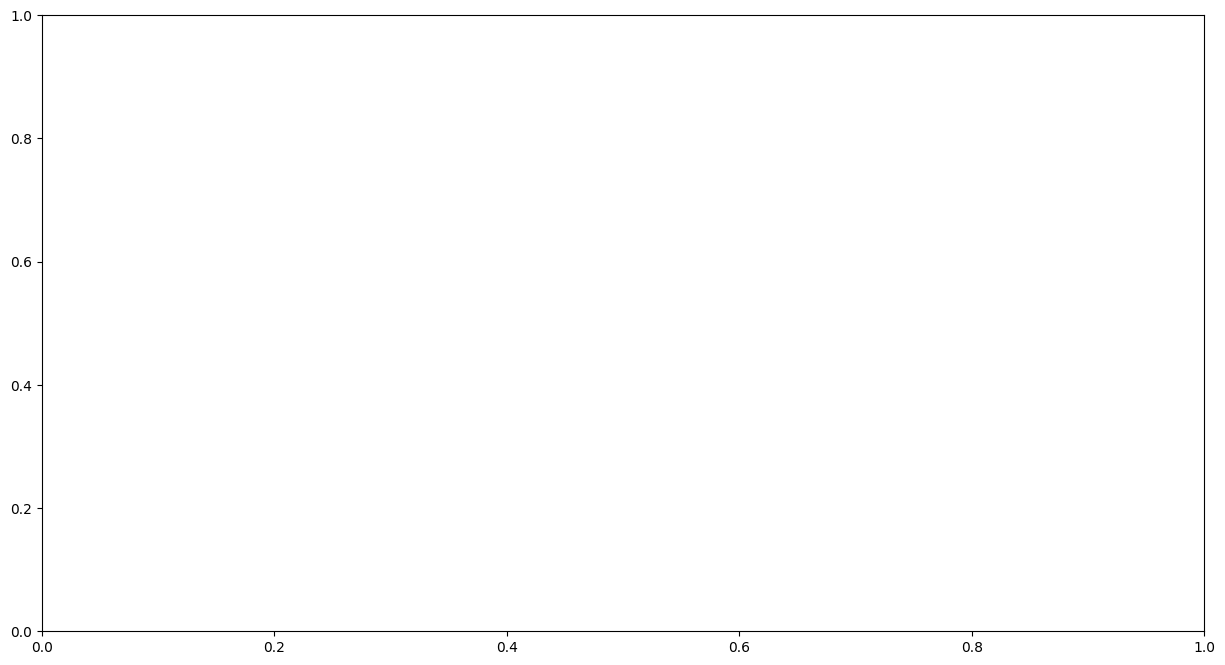

In [78]:
#
# Draw functionality graph
#

#
# Read all data about Test Suites, Test Cases, and implicitly Functionality Graph from file
#
#logger.setLevel(logging.DEBUG)

df_TP, d_TP_weight = f_read_data_from_files("graphV.csv", "graphE.csv", "H_000.TestSuites");
# Return values as 'global' variables:
#   df_node
#   df_edge
#   d_TS_H
#   d_position
#   d_node_label
#   d_edge_label

#
# Requred input data: data frame of test suites (test phase)
#
#df_TP_fun_graph, d_TP_weight_fun_graph = f_read_data_from_files("graphV.csv", "graphE.csv", "Fun_graph.TestSuites")

df_TP_fun_graph = f_generate_fun_graph(d_TS_H);

#
# Draw
#
f_draw_TS(df_TP_fun_graph, "", "fun-graph.eps", "", True, (15,8));


In [ ]:
#
# Draw functionality graph
#

#
# Read all data about Test Suites, Test Cases, and implicitly Functionality Graph from file
#
#logger.setLevel(logging.DEBUG)

df_TP, d_TP_weight = f_read_data_from_files("graphV.csv", "graphE.csv", "H_000.TestSuites");

#
# Requred input data: data frame of test suites (test phase)
#
#df_TP_fun_graph, d_TP_weight_fun_graph = f_read_data_from_files("graphV.csv", "graphE.csv", "Fun_graph.TestSuites")

df_TP_fun_graph = f_generate_fun_graph(d_TS_H);

#
# Draw
#
display(Math('\\textbf{Article Figure:}\\textrm{ Example of the functionality graph } G^P.\
              \\textrm{Vertices } v_1, ..., v_6 \\textrm{ present six functionalities, edges } e_1, ..., e_9\
              \\textrm{ present nine f-influences.}'));

# without name/title "Functionality graph" on the figure
# f_draw_TS(df_TP_fun_graph, "", s_c_results_other+"fun-graph.pdf", "", True, (15,10));
# f_draw_TS(df_TP_fun_graph, "", s_c_results_other+"fun-graph.pdf", "Functionality graph", (17,7));
# f_draw_TS(df_TP_fun_graph.to_dict()['TS_edges'], "", "fun-graph.svg", "Functionality graph", (17,7));
# f_print_var_value('','Functionality graph (EPS)')
# generate eps file for the article
f_draw_TS(df_TP_fun_graph, "", "fun-graph.eps", "", True, (15,8));
f_draw_TS(df_TP_fun_graph, "", s_c_results_other+"fun-graph.pdf", "", False, (15,8));


### Test phase

In [ ]:
#
# Read data frame
#
#logger.setLevel(logging.DEBUG)
df_TP, d_TP_weight = f_read_data_from_files("graphV.csv", "graphE.csv", "H_000.TestSuites")
#logger.setLevel(cell_log_level)

#
# Draw data frames
#
display(Math('\\textbf{Article Figure:}\\textrm{ Example of a test phase } \mathcal H = \{{^i}\!H\}_{i=1}^4'))
f_draw_TS(df_TP.to_dict()['TS_edges'], "", s_c_results_other+"test-phase-H.pdf","",False, (50,10))
f_draw_TS(df_TP.to_dict()['TS_edges'], "", "test-phase-H.eps","Example of a test phase",True, (50,10))


### Test Phase Min Deduplication: $A_{1a}$

In [ ]:
# Store the original log level into 'notebook_log_level'
notebook_log_level = logger.getEffectiveLevel()

In [ ]:
#
# To display test suites graphs set logging level to DEBUG
#

logger.setLevel(section_log_level)

In [ ]:
t_c_test_phase_dim=(70,7)

In [ ]:
#
# Read data frame
#
df_TP, d_TP_weights = f_read_data_from_files("graphV.csv", "graphE.csv", "H_000.TestSuites")

#
# Sort data frame
#
df_TP_sorted = f_sort_TS_in_TP(df_TP,['delta','size'],d_TS_H,bool_local_sort_order_ascending=True)

#logger.setLevel(logging.DEBUG)
#
# Execute Test Phase Min Deduplication
#
df_TP_Min = f_TP_min_deduplication(df_TP_sorted)

#
# Draw data frames
#
#
# To display graphs set logging level to DEBUG
#
logger.setLevel(cell_log_level)
display(Math('\\textbf{Article Figure:}\\textrm{ Subgraphs } {^{1}\!M},{^{2}\!M},{^{3}\!M},{^{4}\!M}\
              \\textrm{ as the result of} \\textit{ Test Phase Deduplication Algorithm } A_{1a}'));

f_draw_TS(df_TP_Min.to_dict()['TS_edges'], "delta", "min-dedupe-weights.eps","",True,t_c_test_phase_dim)

      

### Test Phase Max Deduplication: $A_{1b}$

In [ ]:
#
# Read data frame
#
#logger.setLevel(logging.DEBUG)
df_TP, d_TP_weight = f_read_data_from_files("graphV.csv", "graphE.csv", "H_000.TestSuites")
#logger.setLevel(cell_log_level)

f_print_var_value('df_TP','Test phase (as a set of test suites)');

#
# Sort Test Suites - Ascending
#
bool_sort_order_ascending = False;
df_TP_sorted = f_sort_TS_in_TP(df_TP,['delta','size'],d_TS_H,bool_local_sort_order_ascending=bool_sort_order_ascending)
f_print_var_value('df_TP_sorted','Sort data frame - for max deduplication: bool_sort_order_ascending='+str(bool_sort_order_ascending))

#logger.setLevel(logging.DEBUG)
#
# Execute Test Phase Max Deduplication
#
df_TP_Large_num = f_TP_max_deduplication(df_TP_sorted)
f_print_var_value('df_TP_Large_num','Result from Test Phase Max Deduplication');

#logger.setLevel(cell_log_level)

#
# Draw data frames
#
display(Math('\\textbf{Article Figure:}\\textrm{ Subgraphs } {^{1}\!M},{^{2}\!M},{^{3}\!M},{^{4}\!M}\
              \\textrm{ as the result of} \\textit{ Test Phase Deduplication Algorithm } A_{1b}'));
## f_draw_TS(df_TP_Large_num.to_dict()['TS_edges'], "delta", s_c_results_other+"max-dedupe-weights-nosort.pdf",s_title="", bool_print_to_terminal=False)
f_draw_TS(df_TP_Large_num.to_dict()['TS_edges'], "delta", s_c_results_other+"max-dedupe-weights-nosort.pdf", "", False)
f_draw_TS(df_TP_Large_num.to_dict()['TS_edges'], "delta", "max-dedupe-weights-nosort.eps", "")


### Algorithm $A_2$ for software testing optimization

In [ ]:
df_node

In [ ]:
df_edge

In [ ]:
#
# p_j ... l_pj
# w_j ... l_wj
#
l_pj = list(map(lambda x,y: x*y ,df_edge['kappa'].tolist(), df_edge['sigma'].tolist()))
l_wj = df_edge['kappa'].tolist()

In [ ]:
l_pj

In [ ]:
l_wj

In [ ]:
str(datetime.timedelta(seconds=666))
print("Notebook execution: " + str(datetime.timedelta(seconds=(time.time()-notebook_start_time)))) 

## The end ---------------------------------------